In [30]:
import pandas as pd
import json

# Load Data

Source: <https://www.kaggle.com/datasets/prakharbhandari20/cleantech-google-patent-dataset>

In [31]:
filepath='../data/bq-results-20240124-055833-1706076079048.json'
df_google_patents = pd.read_json(filepath, lines=True)
df_google_patents

,publication_number,application_number,country_code,title_localized,abstract_localized,publication_date,inventor,cpc
0,US-2022239235-A1,US-202217717397-A,US,[{'text': 'Adaptable DC-AC Inverter Drive Syst...,[{'text': 'Disclosed is an adaptable DC-AC inv...,20220728,[],"[{'code': 'H02M7/5395', 'inventive': True, 'fi..."
1,US-2022239251-A1,US-202217580956-A,US,[{'text': 'System for providing the energy fro...,[{'text': 'In accordance with an example embod...,20220728,[],"[{'code': 'H02S40/38', 'inventive': True, 'fir..."
2,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi..."
3,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi..."
4,US-11396827-B2,US-202117606042-A,US,[{'text': 'Control method for optimizing solar...,[{'text': 'A control method for optimizing a s...,20220726,[],"[{'code': 'F24S50/00', 'inventive': True, 'fir..."
...,...,...,...,...,...,...,...,...
29995,CN-214835218-U,CN-202121309411-U,CN,"[{'text': '一种具有充电功能的无人机机库', 'language': 'zh', ...",[{'text': 'The utility model relates to an unm...,20211123,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...","[{'code': 'Y02E10/50', 'inventive': False, 'fi..."
29996,CN-113690940-A,CN-202111107806-A,CN,"[{'text': '一种风电供电控制方法', 'language': 'zh', 'tru...",[{'text': 'The invention provides a wind power...,20211123,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]","[{'code': 'Y02E10/76', 'inventive': False, 'fi..."
29997,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '..."
29998,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '..."


## Flatten nested data

In [32]:
#Extract the english titles and abstracts (there are often two translations)
def filter_english(texts):
    for item in texts:
        if item["language"] == "en":
            return item["text"]
    return None  # Return None if no English text is found

# Apply the function to the "title_localized" column to extract English text
df_google_patents['title'] = df_google_patents['title_localized'].apply(filter_english)
df_google_patents['abstract'] = df_google_patents['abstract_localized'].apply(filter_english)

# Also extracting the languages
df_google_patents['abstract_lang'] = df_google_patents['abstract_localized'].apply(lambda x: [item['language'] for item in x])

# Drop rows where 'abstract' is None
df_google_patents = df_google_patents.dropna(subset=['abstract'])

df_google_patents

,publication_number,application_number,country_code,title_localized,abstract_localized,publication_date,inventor,cpc,title,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,[{'text': 'Adaptable DC-AC Inverter Drive Syst...,[{'text': 'Disclosed is an adaptable DC-AC inv...,20220728,[],"[{'code': 'H02M7/5395', 'inventive': True, 'fi...",Adaptable DC-AC Inverter Drive System and Oper...,Disclosed is an adaptable DC-AC inverter syste...,[en]
1,US-2022239251-A1,US-202217580956-A,US,[{'text': 'System for providing the energy fro...,[{'text': 'In accordance with an example embod...,20220728,[],"[{'code': 'H02S40/38', 'inventive': True, 'fir...",System for providing the energy from a single ...,"In accordance with an example embodiment, a so...",[en]
4,US-11396827-B2,US-202117606042-A,US,[{'text': 'Control method for optimizing solar...,[{'text': 'A control method for optimizing a s...,20220726,[],"[{'code': 'F24S50/00', 'inventive': True, 'fir...",Control method for optimizing solar-to-power e...,A control method for optimizing a solar-to-pow...,[en]
5,CN-114772674-A,CN-202210500131-A,CN,[{'text': 'Low-carbon running saline wastewate...,[{'text': '本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法，...,20220722,[],[],Low-carbon running saline wastewater treatment...,The invention discloses a system and a method ...,"[zh, en]"
6,CN-217026795-U,CN-202220668705-U,CN,[{'text': 'Water ecological remediation device...,[{'text': '本实用新型公开了一种便于调节高度的水生态修复装置，涉及水生态修复技术领...,20220722,[],[],Water ecological remediation device convenient...,The utility model discloses a water ecological...,"[zh, en]"
...,...,...,...,...,...,...,...,...,...,...,...
29995,CN-214835218-U,CN-202121309411-U,CN,"[{'text': '一种具有充电功能的无人机机库', 'language': 'zh', ...",[{'text': 'The utility model relates to an unm...,20211123,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...","[{'code': 'Y02E10/50', 'inventive': False, 'fi...",Unmanned aerial vehicle hangar with function o...,The utility model relates to an unmanned air v...,"[en, zh]"
29996,CN-113690940-A,CN-202111107806-A,CN,"[{'text': '一种风电供电控制方法', 'language': 'zh', 'tru...",[{'text': 'The invention provides a wind power...,20211123,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]","[{'code': 'Y02E10/76', 'inventive': False, 'fi...",Wind power supply control method,The invention provides a wind power supply con...,"[en, zh]"
29997,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '...",Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"
29998,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '...",Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"


In [33]:
# keep only necessary rows
df_google_patents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29926 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   publication_number  29926 non-null  object
 1   application_number  29926 non-null  object
 2   country_code        29926 non-null  object
 3   title_localized     29926 non-null  object
 4   abstract_localized  29926 non-null  object
 5   publication_date    29926 non-null  int64 
 6   inventor            29926 non-null  object
 7   cpc                 29926 non-null  object
 8   title               29926 non-null  object
 9   abstract            29926 non-null  object
 10  abstract_lang       29926 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


## Drop unnecessary columns

In [34]:
# not sure about cpc-column. Suppose we drop it? -> Yes
df_google_patents.cpc.values[:5]

array([list([{'code': 'H02M7/5395', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J3/32', 'inventive': False, 'first': False, 'tree': []}, {'code': 'H02M1/32', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J1/10', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J3/381', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02M7/493', 'inventive': True, 'first': True, 'tree': []}, {'code': 'H02J2300/24', 'inventive': False, 'first': False, 'tree': []}, {'code': 'H02J2300/30', 'inventive': False, 'first': False, 'tree': []}]),
       list([{'code': 'H02S40/38', 'inventive': True, 'first': False, 'tree': []}, {'code': 'G01R22/061', 'inventive': True, 'first': False, 'tree': []}, {'code': 'B60L53/51', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02S40/32', 'inventive': True, 'first': True, 'tree': []}]),
       list([{'code': 'F24S50/00', 'inventive': True, 'first': False, 'tree': []}, {'code': 'F01K7/165', 'inventive': True, 'f

In [35]:
df_google_patents.drop(columns=['cpc', 'abstract_localized', 'title_localized'], inplace=True)
df_google_patents

C:\Users\Viktor\AppData\Local\Temp\ipykernel_4296\210969299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_patents.drop(columns=['cpc', 'abstract_localized', 'title_localized'], inplace=True)


,publication_number,application_number,country_code,publication_date,inventor,title,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,20220728,[],Adaptable DC-AC Inverter Drive System and Oper...,Disclosed is an adaptable DC-AC inverter syste...,[en]
1,US-2022239251-A1,US-202217580956-A,US,20220728,[],System for providing the energy from a single ...,"In accordance with an example embodiment, a so...",[en]
4,US-11396827-B2,US-202117606042-A,US,20220726,[],Control method for optimizing solar-to-power e...,A control method for optimizing a solar-to-pow...,[en]
5,CN-114772674-A,CN-202210500131-A,CN,20220722,[],Low-carbon running saline wastewater treatment...,The invention discloses a system and a method ...,"[zh, en]"
6,CN-217026795-U,CN-202220668705-U,CN,20220722,[],Water ecological remediation device convenient...,The utility model discloses a water ecological...,"[zh, en]"
...,...,...,...,...,...,...,...,...
29995,CN-214835218-U,CN-202121309411-U,CN,20211123,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",Unmanned aerial vehicle hangar with function o...,The utility model relates to an unmanned air v...,"[en, zh]"
29996,CN-113690940-A,CN-202111107806-A,CN,20211123,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",Wind power supply control method,The invention provides a wind power supply con...,"[en, zh]"
29997,CN-113683210-A,CN-202110998828-A,CN,20211123,[An Zhixia],Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"
29998,CN-113683210-A,CN-202110998828-A,CN,20211123,[An Zhixia],Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"


## Parse date column

In [36]:
# turn date into date-column
df_google_patents.publication_date = pd.to_datetime(df_google_patents.publication_date, format="%Y%m%d")
df_google_patents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29926 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   publication_number  29926 non-null  object        
 1   application_number  29926 non-null  object        
 2   country_code        29926 non-null  object        
 3   publication_date    29926 non-null  datetime64[ns]
 4   inventor            29926 non-null  object        
 5   title               29926 non-null  object        
 6   abstract            29926 non-null  object        
 7   abstract_lang       29926 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 2.1+ MB


C:\Users\Viktor\AppData\Local\Temp\ipykernel_4296\1357104401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_patents.publication_date = pd.to_datetime(df_google_patents.publication_date, format="%Y%m%d")


## Check for duplicates

In [37]:
# abstract is propably the most important column, we check its contents
df_google_patents[df_google_patents.duplicated(subset=['abstract'], keep=False)]

,publication_number,application_number,country_code,publication_date,inventor,title,abstract,abstract_lang
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,The invention discloses a system and a method ...,"[zh, en]"
6,CN-217026795-U,CN-202220668705-U,CN,2022-07-22,[],Water ecological remediation device convenient...,The utility model discloses a water ecological...,"[zh, en]"
7,CN-114777546-A,CN-202210702520-A,CN,2022-07-22,[],Cold and hot medium energy storage hot water a...,The invention relates to the technical field o...,"[en, zh]"
8,CN-217027597-U,CN-202220203603-U,CN,2022-07-22,[],Solar energy respiratory wall based on princip...,The utility model discloses a solar energy bre...,"[zh, en]"
9,CN-217035692-U,CN-202220372280-U,CN,2022-07-22,[],Vehicle-mounted hydrogen energy storage equipm...,The utility model provides a vehicle-mounted h...,"[zh, en]"
...,...,...,...,...,...,...,...,...
29991,CN-214811978-U,CN-202121614511-U,CN,2021-11-23,"[ZHANG HUANBING, YE CHANGHAI]",Solar photo-thermal wood-based material harmfu...,The utility model discloses a device for purif...,"[zh, en]"
29992,CN-214811978-U,CN-202121614511-U,CN,2021-11-23,"[ZHANG HUANBING, YE CHANGHAI]",Solar photo-thermal wood-based material harmfu...,The utility model discloses a device for purif...,"[zh, en]"
29997,CN-113683210-A,CN-202110998828-A,CN,2021-11-23,[An Zhixia],Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"
29998,CN-113683210-A,CN-202110998828-A,CN,2021-11-23,[An Zhixia],Floating solar aeration device based on wirele...,The invention discloses a floating solar aerat...,"[zh, en]"


In [38]:
# quite some duplicates found - let's drop them
df_google_patents.drop_duplicates(subset=['abstract'], inplace=True)
df_google_patents

C:\Users\Viktor\AppData\Local\Temp\ipykernel_4296\3566286115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_patents.drop_duplicates(subset=['abstract'], inplace=True)


,publication_number,application_number,country_code,publication_date,inventor,title,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,2022-07-28,[],Adaptable DC-AC Inverter Drive System and Oper...,Disclosed is an adaptable DC-AC inverter syste...,[en]
1,US-2022239251-A1,US-202217580956-A,US,2022-07-28,[],System for providing the energy from a single ...,"In accordance with an example embodiment, a so...",[en]
4,US-11396827-B2,US-202117606042-A,US,2022-07-26,[],Control method for optimizing solar-to-power e...,A control method for optimizing a solar-to-pow...,[en]
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,The invention discloses a system and a method ...,"[zh, en]"
6,CN-217026795-U,CN-202220668705-U,CN,2022-07-22,[],Water ecological remediation device convenient...,The utility model discloses a water ecological...,"[zh, en]"
...,...,...,...,...,...,...,...,...
29993,CN-214850044-U,CN-202120980740-U,CN,2021-11-23,"[WANG HAI, WANG YANG]",Box transformer substation capable of adjustin...,The utility model relates to a case becomes te...,"[en, zh]"
29994,CN-214840532-U,CN-202121225269-U,CN,2021-11-23,"[Gao Zhelu, Dai Jiangyue, LIU ZIYI, YAN CONGQI...",Garden waste anaerobic fermentation coupling m...,The utility model discloses a gardens discarde...,"[en, zh]"
29995,CN-214835218-U,CN-202121309411-U,CN,2021-11-23,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",Unmanned aerial vehicle hangar with function o...,The utility model relates to an unmanned air v...,"[en, zh]"
29996,CN-113690940-A,CN-202111107806-A,CN,2021-11-23,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",Wind power supply control method,The invention provides a wind power supply con...,"[en, zh]"


We are left with 13'297 patents to work with.

# First Overview

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

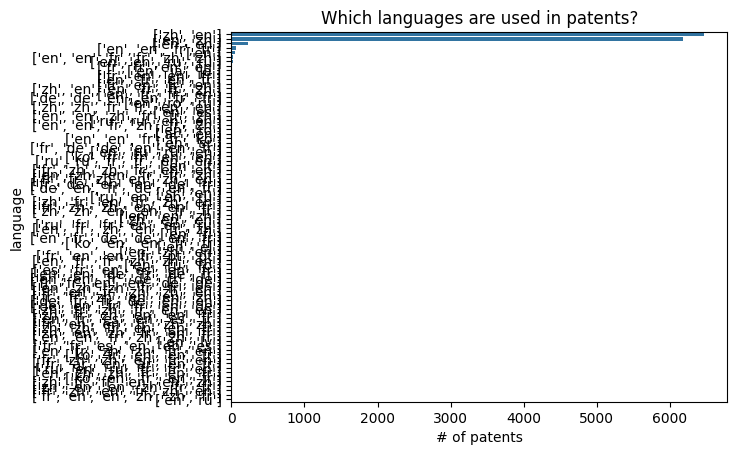

In [40]:
# there seem to be different languages, let's check

sns.countplot(
    df_google_patents, 
    y="abstract_lang", 
    order=df_google_patents['abstract_lang'].value_counts().index)

plt.title("Which languages are used in patents?")
plt.xlabel("# of patents")
plt.ylabel("language")
plt.show()

# Text preprocessing

In [41]:
import re
import nltk
df_google_patents

,publication_number,application_number,country_code,publication_date,inventor,title,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,2022-07-28,[],Adaptable DC-AC Inverter Drive System and Oper...,Disclosed is an adaptable DC-AC inverter syste...,[en]
1,US-2022239251-A1,US-202217580956-A,US,2022-07-28,[],System for providing the energy from a single ...,"In accordance with an example embodiment, a so...",[en]
4,US-11396827-B2,US-202117606042-A,US,2022-07-26,[],Control method for optimizing solar-to-power e...,A control method for optimizing a solar-to-pow...,[en]
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,The invention discloses a system and a method ...,"[zh, en]"
6,CN-217026795-U,CN-202220668705-U,CN,2022-07-22,[],Water ecological remediation device convenient...,The utility model discloses a water ecological...,"[zh, en]"
...,...,...,...,...,...,...,...,...
29993,CN-214850044-U,CN-202120980740-U,CN,2021-11-23,"[WANG HAI, WANG YANG]",Box transformer substation capable of adjustin...,The utility model relates to a case becomes te...,"[en, zh]"
29994,CN-214840532-U,CN-202121225269-U,CN,2021-11-23,"[Gao Zhelu, Dai Jiangyue, LIU ZIYI, YAN CONGQI...",Garden waste anaerobic fermentation coupling m...,The utility model discloses a gardens discarde...,"[en, zh]"
29995,CN-214835218-U,CN-202121309411-U,CN,2021-11-23,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",Unmanned aerial vehicle hangar with function o...,The utility model relates to an unmanned air v...,"[en, zh]"
29996,CN-113690940-A,CN-202111107806-A,CN,2021-11-23,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",Wind power supply control method,The invention provides a wind power supply con...,"[en, zh]"


# Tokenize Words

In [42]:
df_google_patents["abstract"]

0        Disclosed is an adaptable DC-AC inverter syste...
1        In accordance with an example embodiment, a so...
4        A control method for optimizing a solar-to-pow...
5        The invention discloses a system and a method ...
6        The utility model discloses a water ecological...
                               ...                        
29993    The utility model relates to a case becomes te...
29994    The utility model discloses a gardens discarde...
29995    The utility model relates to an unmanned air v...
29996    The invention provides a wind power supply con...
29997    The invention discloses a floating solar aerat...
Name: abstract, Length: 13199, dtype: object

In [43]:
# Function to clean and extract data
def tokenize_column(data):
    # Split the data based on the pattern '(extra_info)'
    re_tokens = re.findall('[\w]+', data)
    # Return the first part, which is the cleaned data
    return re_tokens

df_google_patents.loc[:, "token_content"] = df_google_patents["abstract"].apply(tokenize_column)

df_google_patents["token_content"]

C:\Users\Viktor\AppData\Local\Temp\ipykernel_4296\814564271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_patents.loc[:, "token_content"] = df_google_patents["abstract"].apply(tokenize_column)


0        [Disclosed, is, an, adaptable, DC, AC, inverte...
1        [In, accordance, with, an, example, embodiment...
4        [A, control, method, for, optimizing, a, solar...
5        [The, invention, discloses, a, system, and, a,...
6        [The, utility, model, discloses, a, water, eco...
                               ...                        
29993    [The, utility, model, relates, to, a, case, be...
29994    [The, utility, model, discloses, a, gardens, d...
29995    [The, utility, model, relates, to, an, unmanne...
29996    [The, invention, provides, a, wind, power, sup...
29997    [The, invention, discloses, a, floating, solar...
Name: token_content, Length: 13199, dtype: object

# Stopwords Removal

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_nltk = stopwords.words('english')

# Function to remove the stopwords
def stopwords_removal(data):
    # Split the data based on the pattern '(extra_info)'
    filtered_stopwords = []
    for word in data:
        if word.lower() not in stop_words_nltk:
            filtered_stopwords.append(word)
        else:
            pass

    return filtered_stopwords

# Apply stopwords removal function to the 'content' column
df_google_patents.loc[:, "token_content"] = df_google_patents["token_content"].apply(stopwords_removal)

print(len(df_google_patents["token_content"] ), df_google_patents["token_content"] )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


13199 0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
4        [control, method, optimizing, solar, power, ef...
5        [invention, discloses, system, method, treatin...
6        [utility, model, discloses, water, ecological,...
                               ...                        
29993    [utility, model, relates, case, becomes, techn...
29994    [utility, model, discloses, gardens, discarded...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provides, wind, power, supply, con...
29997    [invention, discloses, floating, solar, aerati...
Name: token_content, Length: 13199, dtype: object


# Lemmatization

In [45]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
nltk_lemmatizer = WordNetLemmatizer()

# Function to lemmatize
def lemmatize_tokens(tokens):
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(w) for w in tokens]
    return lemmatized_tokens

df_google_patents.loc[:, "token_content"] = df_google_patents["token_content"].apply(lemmatize_tokens)

# Display the DataFrame
print(df_google_patents["token_content"])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
4        [control, method, optimizing, solar, power, ef...
5        [invention, discloses, system, method, treatin...
6        [utility, model, discloses, water, ecological,...
                               ...                        
29993    [utility, model, relates, case, becomes, techn...
29994    [utility, model, discloses, garden, discarded,...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provides, wind, power, supply, con...
29997    [invention, discloses, floating, solar, aerati...
Name: token_content, Length: 13199, dtype: object


In [46]:
print(df_google_patents["token_content"].iloc[0])

['Disclosed', 'adaptable', 'DC', 'AC', 'inverter', 'system', 'operation', 'system', 'includes', 'multiple', 'DC', 'input', 'source', 'input', 'provide', 'stable', 'operation', 'various', 'condition', 'DC', 'input', 'source', 'may', 'added', 'system', 'removed', 'system', 'without', 'impacting', 'functionality', 'system', 'disclosed', 'system', 'suited', 'solar', 'energy', 'harvesting', 'grid', 'connected', 'grid', 'mode', 'operation']


# Adding Pos Tags

In [47]:
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from collections import defaultdict

# Download NLTK resources
nltk.download('averaged_perceptron_tagger')

# Initialize default tag mapping
tag_map_nltk = defaultdict(lambda : wn.NOUN)
tag_map_nltk['J'] = wn.ADJ
tag_map_nltk['V'] = wn.VERB
tag_map_nltk['R'] = wn.ADV

# Function to lemmatize tokens with POS tagging
def adding_pos_tags(tokens):
    nltk_lemmatizer = nltk.WordNetLemmatizer()
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(token, tag_map_nltk[tag[0]]) for token, tag in pos_tags]
    return lemmatized_tokens

df_google_patents.loc[:, "token_content"] = df_google_patents["token_content"].apply(adding_pos_tags)

# Display the DataFrame
print(df_google_patents["token_content"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
4        [control, method, optimize, solar, power, effi...
5        [invention, disclose, system, method, treat, l...
6        [utility, model, disclose, water, ecological, ...
                               ...                        
29993    [utility, model, relate, case, become, technic...
29994    [utility, model, disclose, garden, discard, ob...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provide, wind, power, supply, cont...
29997    [invention, disclose, float, solar, aeration, ...
Name: token_content, Length: 13199, dtype: object


# Stemming

In [48]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
ps = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    stemmed_tokens = [ps.stem(w) for w in tokens]
    return stemmed_tokens

df_google_patents.loc[:, "token_content"] = df_google_patents["token_content"].apply(stem_tokens)

# Display the DataFrame
print(df_google_patents["token_content"])

0        [disclos, adapt, dc, ac, invert, system, oper,...
1        [accord, exampl, embodi, solar, energi, system...
4        [control, method, optim, solar, power, effici,...
5        [invent, disclos, system, method, treat, low, ...
6        [util, model, disclos, water, ecolog, restor, ...
                               ...                        
29993    [util, model, relat, case, becom, technic, fie...
29994    [util, model, disclos, garden, discard, object...
29995    [util, model, relat, unman, air, vehicl, techn...
29996    [invent, provid, wind, power, suppli, control,...
29997    [invent, disclos, float, solar, aerat, devic, ...
Name: token_content, Length: 13199, dtype: object


In [49]:
print(df_google_patents["token_content"].iloc[0])

['disclos', 'adapt', 'dc', 'ac', 'invert', 'system', 'oper', 'system', 'includ', 'multipl', 'dc', 'input', 'sourc', 'input', 'provid', 'stabl', 'oper', 'variou', 'condit', 'dc', 'input', 'sourc', 'may', 'add', 'system', 'remov', 'system', 'without', 'impact', 'function', 'system', 'disclos', 'system', 'suit', 'solar', 'energi', 'harvest', 'grid', 'connect', 'grid', 'mode', 'oper']


# Write to disk

In [50]:
df_google_patents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13199 entries, 0 to 29997
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   publication_number  13199 non-null  object        
 1   application_number  13199 non-null  object        
 2   country_code        13199 non-null  object        
 3   publication_date    13199 non-null  datetime64[ns]
 4   inventor            13199 non-null  object        
 5   title               13199 non-null  object        
 6   abstract            13199 non-null  object        
 7   abstract_lang       13199 non-null  object        
 8   token_content       13199 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.0+ MB


In [51]:
df_google_patents.to_csv('../data/google_patents.csv', index=False)